Group Member: Haijing ZHU, Ting ZHU, Huajuan ZHOU, You SHAN, Zhen XING

Matplotlib Exercise

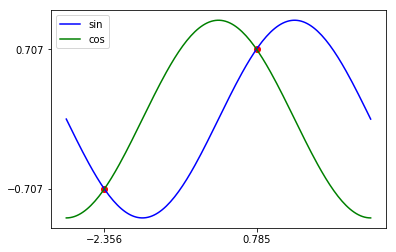

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.optimize import brentq
a=np.pi
fig,ax=plt.subplots()
x=np.linspace(-a,a,150)
y=np.sin(x)
ax.plot(x,y,'b-',label='sin')
ax.legend()
z=np.cos(x)
ax.plot(x,z,'g-',label='cos')
ax.legend()
m=brentq(lambda x:np.sin(x)-np.cos(x),-a,0)
n=brentq(lambda x:np.sin(x)-np.cos(x),0,a)
plt.scatter([m,n],[np.sin(m),np.sin(n)],color='red')
ax.set_xticks([m,n])
ax.set_yticks([np.sin(m),np.sin(n)])
plt.show()

Scipy Exercise

Exercise1

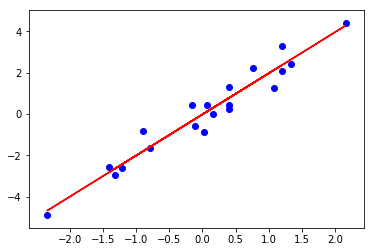

In [8]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
x=np.random.randn(20)
y=2*x+0.5*np.random.randn(20)
t=y
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
z=gradient*x+intercept
ax.plot(x,z,'r-')
ax.scatter(x,t,c='b')
xticks=np.arange(-2,2.5,0.5)
yticks=np.arange(-4,5,2)
plt.xticks(xticks)
plt.yticks(yticks)
plt.show()

Exercise2

In [7]:
from scipy.optimize import fsolve
def f(x):
    x0,x1=x.tolist()
    return[x0*x0-3*x0+7-385,x1*x1-3*x1+7-385]
r=fsolve(f,[3,5])
print(r)

[-18.  21.]


Exercise3

In [9]:
def bifunc(f,a,b):
    if abs(f(a))<=1e-10:
        return a
    if abs(f(b))<=1e-10:
        return b
    if f((a+b)/2)*f(b)<=0:
        return bifunc(f,(a+b)/2,b)
    if  f((a+b)/2)*f(a)<=0:
        return bifunc(f,a,(a+b)/2)
    
f = lambda x: np.sin(x)-np.cos(x)
x1=bifunc(f, 0,1)
x1

0.7853981633670628

Additional Exercises

Excercise 1

In [21]:
#using looping implementation
import numpy as np
array=np.random.randn(10000000)
n=len(array)
for i in range(n):
    if array[i]<0:
        array[i]=0
%time array

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


array([ 0.        ,  0.        ,  0.        , ...,  1.1483153 ,
        1.51881259,  0.41881235])

In [19]:
#without looping_version1
import numpy as np
array=np.random.randn(10000000)
def f(x): return 0 if x<0 else x
f=np.vectorize(f)
%time f(array)

CPU times: user 2.26 s, sys: 279 ms, total: 2.54 s
Wall time: 2.64 s


array([0, 0, 0, ..., 0, 0, 0])

In [20]:
#without looping_version2
import numpy as np
array=np.random.randn(10000000)
%time np.where(array<0,0,array)

CPU times: user 62.8 ms, sys: 8.15 ms, total: 70.9 ms
Wall time: 71.1 ms


array([ 1.00177101,  2.34963537,  0.        , ...,  0.        ,
        0.        ,  1.40509732])

In [178]:
#without looping_version3
x = np.random.randn(10000000)
x1=(x>=0)
x2=x*x1

%time x2

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


array([ 0.12127307,  1.43167741,  1.81777141, ...,  0.22179434,
       -0.        , -0.        ])

Exercise 2

In [163]:
#Solution 1
import numpy as np
def f(k):
    a0=np.linspace(0,4*(k-1),k)
    a1=a0+1
    a2=a1+1
    a3=a2+1
    return np.array((a0,a1,a2,a3))
%time f(3)

CPU times: user 303 µs, sys: 121 µs, total: 424 µs
Wall time: 316 µs


array([[  0.,   4.,   8.],
       [  1.,   5.,   9.],
       [  2.,   6.,  10.],
       [  3.,   7.,  11.]])

In [179]:
#Solution 2
import numpy as np
def f(x):
    A=np.linspace( 0,4*(int(x)-1),int(x))
    return np.vstack((A,A+1,A+2,A+3))
%time
f(3)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


array([[  0.,   4.,   8.],
       [  1.,   5.,   9.],
       [  2.,   6.,  10.],
       [  3.,   7.,  11.]])

Exercise 3

In [180]:
#Part1: Computing gcd_Solution1
import numpy as np
def gcd(a,b,count):
    if a<b:
        t=b
        b=a
        a=t
    str="%d%s%d%s%d%s"%(count,':gcd(',a,',',b,')')
    print(str)
    if a%b==0:
        return b
    else:
        m=a-b*np.int(a/b)
        return gcd(m,b,count+1)

x=gcd(123456,7890,0)
x

0:gcd(123456,7890)
1:gcd(7890,5106)
2:gcd(5106,2784)
3:gcd(2784,2322)
4:gcd(2322,462)
5:gcd(462,12)
6:gcd(12,6)


6

In [24]:
#Part1: Computing gcd_Solution2
import numpy as np
def gcd(a,b,count):
    if a<b:
        a,b=b,a     
    str="%d%s%d%s%d%s"%(count,':gcd(',a,',',b,')')
    print(str)
    if a%b==0:
        return b
    else:
        m=a-b*np.int(a/b)
        return gcd(m,b,count+1)

x=gcd(123456,7890,0)
x

0:gcd(123456,7890)
1:gcd(7890,5106)
2:gcd(5106,2784)
3:gcd(2784,2322)
4:gcd(2322,462)
5:gcd(462,12)
6:gcd(12,6)


6

In [25]:
#Part2: Computing lcm
def lcm(a,b):
    return a*b/gcd(a,b,0)

y=lcm(123456,7890)
y

0:gcd(123456,7890)
1:gcd(7890,5106)
2:gcd(5106,2784)
3:gcd(2784,2322)
4:gcd(2322,462)
5:gcd(462,12)
6:gcd(12,6)


162344640.0

Exercise 4

In [164]:
#Solution 1
str='This is           for removing       redundant spaces'
print(' '.join(str.split()))

This is for removing redundant spaces


In [182]:
#Solution 2
import re
re.sub(' +',' ','This is           for removing       redundant spaces')

'This is for removing redundant spaces'

In [ ]:
Exercise 5

In [74]:
import numpy as np
a=np.array((2,18,9,22,17,24,8,12,27))
b=np.where(a%3==0,a,0)
set(a).intersection(set(b))

{9, 12, 18, 24, 27}

Exercise 6

In [23]:
keep=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',' ','-',"'"]  
stop_words=['to','a','as','this','for','in','on','but']  
def normalize(s):  
    result=''  
    for c in s.lower():  
        if c in keep:  
            result+=c  
    return result  
def make_dict(s):  
    words=normalize(s).split()  
    d={}  
    for w in words:  
        if w in d:  
            d[w]+=1  
        else:  
            d[w]=1  
    return d  
f = open('/Users/zhuhaijing/Desktop/Walden.txt') # open the file 'Walden.txt' via its path
c = f.read() 
d=make_dict(c)  
lst=[(d[w],w) for w in d]  
lst.sort()  
lst.reverse()     
print('The 20 most frequent words and their occurences are (after excluding words in the dictionary we set)：')  
j=1  
for count,word in lst[:]:  
    if word not in stop_words:  
        print((j,count,word))  
        j+=1  
    if j==21:  
        break

The 20 most frequent words and their occurences are (after excluding words in the dictionary we set)：
(1, 7281, 'the')
(2, 4579, 'and')
(3, 3487, 'of')
(4, 1925, 'i')
(5, 1680, 'it')
(6, 1334, 'is')
(7, 1329, 'that')
(8, 1051, 'not')
(9, 882, 'was')
(10, 880, 'or')
(11, 876, 'with')
(12, 868, 'which')
(13, 775, 'my')
(14, 756, 'he')
(15, 737, 'be')
(16, 723, 'his')
(17, 710, 'they')
(18, 684, 'by')
(19, 672, 'have')
(20, 670, 'are')


Exercise 7

In [184]:
#Solution 1
import numpy as np

def prime(x):
    for i in range(2,x):
        if x%i==0:
            break
    else: return "yes"
prime=np.vectorize(prime)  
def f(n):
    a=np.arange(2,n+1)
    b=prime(a)
    c=np.where(b=="yes",a,0)
    index=[idx for idx,x in enumerate(c) if x==0]
    d=np.delete(c,index)
    return d
f(13)     

array([ 2,  3,  5,  7, 11, 13])

In [185]:
#Solution 2
def primeNumber(n):  
    x = 1    
    for i in range(3,n+1):  
        result = True  
        for j in range(2,i-1):  
            if i % j == 0:  
                result = False  
        if result == True:    
            x += 1  
            print(i)
primeNumber(80)

3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
